In [76]:
import tensorflow as tf
from tensorflow import keras

In [77]:
print(tf.__version__)

2.17.0


In [78]:
print(keras.__version__)

3.4.1


In [79]:
keras.datasets.mnist.load_data?

Signature: keras.datasets.mnist.load_data(path='mnist.npz')
Docstring:
Loads the MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images.
More info can be found at the
[MNIST homepage](http://yann.lecun.com/exdb/mnist/).

Args:
    path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).

Returns:
    Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**`x_train`**: `uint8` NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data. Pixel values range
  from 0 to 255.

**`y_train`**: `uint8` NumPy array of digit labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**`x_test`**: `uint8` NumPy array of grayscale image data with shapes
  `(10000, 28, 28)`, containing the test data. Pixel values range
  from 0 to 255.

**`y_test`**: `uint8` NumPy array of digit labels (integers in range 0-9)
  with shape `(10000,)`

In [80]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [81]:
import numpy as np
np.set_printoptions(linewidth=5000)
x_train[0] # note the printed out array looks like number 5 when you zoom out

# ml split into 2 pts - training & testing
# x_train[0] # input data
# y_train # labels
# x_test, y_test: similar set of inputs and labels that the model hasn't seen yet, used to test your model


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

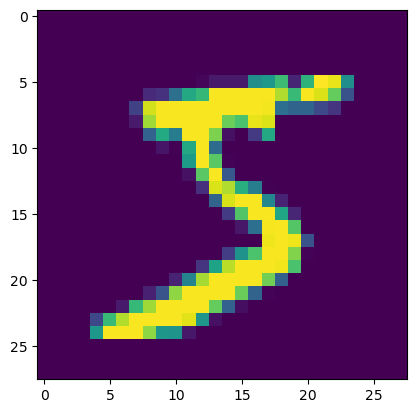

In [83]:
plt.imshow(x_train[0]) 

In [84]:
print(y_train[0])

5


In [85]:
# ml models usu work w/ floats, not ints
# need to convert all those ints to floats and rescale
# stabilization of model
# data & signal need to be normalized, ideally shrank to vals close to 0
x_train = x_train/255.0 # divide each pixel by 255
x_test = x_test/255.0

In [86]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        

In [87]:
from tensorflow.keras  import Sequential # class that describes type of models
# layers are added sequentially (cf recurrent neural networks)

from tensorflow.keras.layers import Dense, Flatten, Input
# Dense is a fully connected layer: all neurons from prev layer connected to the next one
# Flatten: to flatten the 2d img to a 1d array that will be fed to the model

In [88]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))# 1st layer is just input desc, a flattened representation of img





In [89]:
model.add(Dense(units=256, activation='relu')) # 256 neurons

# units: how many neurons we want;
# pass to func the sum of all inputs multiplied by weights
# activation: activation fn, e.g. relu or sigmoid, 

# sigmoid will flatten the distribution to 0..1
# exponents complicate things, we need a lookup func to find the value
# calculating even one value of sigmoid requires several iterations on cpu/gpu

# relu (rectified linear unit)": relu = max(x, 0)
# so negatives are also turned to 0s
# this makes it very fast - we need to check only one bit for the sign of the number

# the reason relu hadn't been used from the start was the fear that the values might get too big
# some solutions: use 64 bits per number instead of 32
# there are also other regularization mechanisms: weights adjust to the amplitude of the signal so you don't end up with huge nums

# to get the result, add output layer:
model.add(Dense(units=10, activation='softmax')) # we want 10 neurons since we have 10 digits; 

# all 256 neurons from prev layer should be connected to all 10 neurons/units in last layer
# each of those 10 neurons should print out sth

# softmax is similar to signoid, output distribution is 0..1, 
# but if you have multiple units in last layer, it will normalize all outputs to 1;
# it guarantees the sum of all outputs will be one;
# this allows us to look at the outputs of the neurons in the last layer as probabilities
# (in our example, those would be the probabilities of a digit being 0, 1, 2 etc.)
# ~ almost like one-hot encoding

model.summary()

# in this example, we have input as layer 0, 256 neurons for layer 1, and 10 neurons as layer 2, our output
# since the model is dense, the intensity of every pixel is fed to each neuron in layer 1
# all the neurons have weights and biases, whose start values are random, and are tweaked thru back propagation;
# BACK-PROPAGATION:
# if prediction is correct, weights are increased even more; 
# if not correct, and some pathways were activated, we'll try to get rid of those strong connections by minimizing the weights,
# and reinforcing the appropriate weights 
# since weights start random, we need a lot of iterations

# play around with differen architecture/typology, 
# e.g. change the num of neurons, add more layers to model etc. - e.g less neurons per layer, but more layers 

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
x_train.shape

# output: (60000, 28, 28): 60000 images for each digit for training, 28x28 resolution


(60000, 28, 28)

In [91]:
# Defining solver: how we want to get to solution and what is our loss func
# model.compile(optimizer='adam', ) # e.g. gd: gradient descent or adam (similar, but a little faster than gd)

model.compile?

Signature:
model.compile(
    optimizer='rmsprop',
    loss=None,
    loss_weights=None,
    metrics=None,
    weighted_metrics=None,
    run_eagerly=False,
    steps_per_execution=1,
    jit_compile='auto',
    auto_scale_loss=True,
)
Docstring:
Configures the model for training.

Example:

```python
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.FalseNegatives(),
    ],
)
```

Args:
    optimizer: String (name of optimizer) or optimizer instance. See
        `keras.optimizers`.
    loss: Loss function. May be a string (name of loss function), or
        a `keras.losses.Loss` instance. See `keras.losses`. A
        loss function is any callable with the signature
        `loss = fn(y_true, y_pred)`, where `y_true` are the ground truth
        values, and `y_pred` are the model's predictions.
        `y_true` should have shape `(batch_size, d0

In [92]:
# define solver:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

# optimizer: e.g. gd: gradient descent or adam (similar, but a little faster than gd)
# loss: SparseCategoricalCrossentropy recommended for use-cases like ours, 10 neurons with softmax
# metrics: how we measure success

In [93]:
x_test.shape

(10000, 28, 28)

In [94]:
# do training itself
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
# epoch: full training pass over entire training set such that each example has been processed once: n_examples/batch_size training iterations
# after each epoch, the model will go thru all x_tests and y_tests passed as validation_data to estimate accuracy

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8911 - loss: 0.3811 - val_accuracy: 0.9647 - val_loss: 0.1117
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9713 - loss: 0.0975 - val_accuracy: 0.9730 - val_loss: 0.0869
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9819 - loss: 0.0583 - val_accuracy: 0.9747 - val_loss: 0.0792
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9877 - loss: 0.0415 - val_accuracy: 0.9780 - val_loss: 0.0702
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9908 - loss: 0.0308 - val_accuracy: 0.9791 - val_loss: 0.0693
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0240 - val_accuracy: 0.9800 - val_loss: 0.0677
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9951 - loss: 0.0171 - val_accuracy: 0.9780 - val_loss: 0.0870
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9956 - loss: 0.0141 - 

In [95]:
h = model.history.history

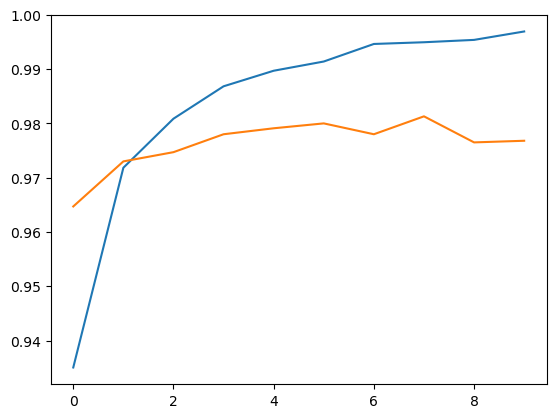

In [96]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9968 - loss: 0.0089 - val_accuracy: 0.9803 - val_loss: 0.0819
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9981 - loss: 0.0064 - val_accuracy: 0.9800 - val_loss: 0.0884
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9988 - loss: 0.0049 - val_accuracy: 0.9825 - val_loss: 0.0882
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9980 - loss: 0.0057 - val_accuracy: 0.9818 - val_loss: 0.0939
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9983 - loss: 0.0053 - val_accuracy: 0.9815 - val_loss: 0.0910
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9983 - loss: 0.0053 - val_accuracy: 0.9785 - val_loss: 0.1086
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9983 - loss: 0.0047 - val_accuracy: 0.9807 - val_loss: 0.1064
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9985 - loss: 0.0048 - 

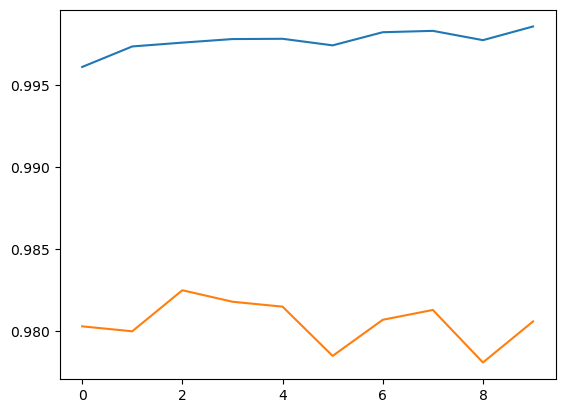

In [97]:
# try different architecture
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=16, activation='relu'))

model2.add(Dense(units=10, activation='softmax'))

model2.summary()

# define solver:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

# do training itself
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

h = model.history.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])


In [98]:
# with multiple models, what is the proper way to compare accuracies of different solutions,
# and how to split data - currently we only have train and test sets, but usu. it's split into 3 pts:
# 70% training set, 20% test set, 10% validation

# validation: imgs our models have never seen before - separate from training and test data sets

# when trying out different models with different typologies, we are relying on validation accuracy (val_accuracy)

# to evaluate models, use the 10% validation data set models have never seen before and use those results to calculate accuracy;
# motivation for above: more confidence in accuracy prediction than relying on test data only
# if test data set is biased, it might affect accuracy res